Data Scientist Workshop - ex.5.1 - Adam Trentowski, 162602


In [56]:
import pandas as pd
from pandas.plotting import parallel_coordinates
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import andrews_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [57]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_05/files/iris.csv')

In [58]:
dataset.shape

(150, 6)

In [59]:
dataset.head()

,Id,sepal.length,sepal.width,petal.length,petal.width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [60]:
dataset.describe()

,Id,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Number of instances (rows) that belong to each class:

In [61]:
dataset.groupby('Species').size()

Species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [62]:
feature_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
X = dataset[feature_columns].values  # or X = dataset.iloc[:, 1:5].values
y = dataset['Species'].values  # or y = dataset.iloc[:, 5].values

In [63]:
le = LabelEncoder()
y = le.fit_transform(y)

Parallel Coordinates Plot

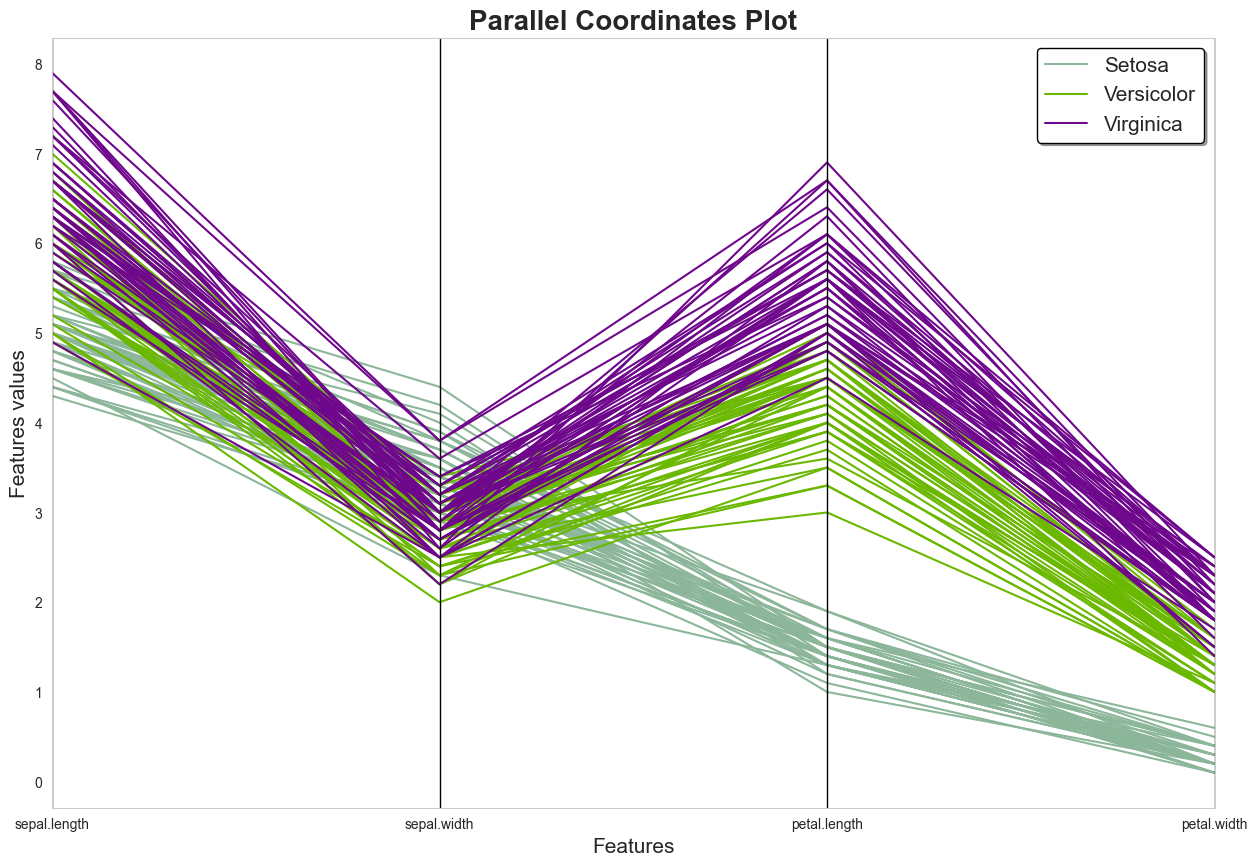

In [64]:
plt.figure(figsize=(15, 10))
parallel_coordinates(dataset.drop('Id', axis=1), 'Species')

plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

Andrews Curves Plot

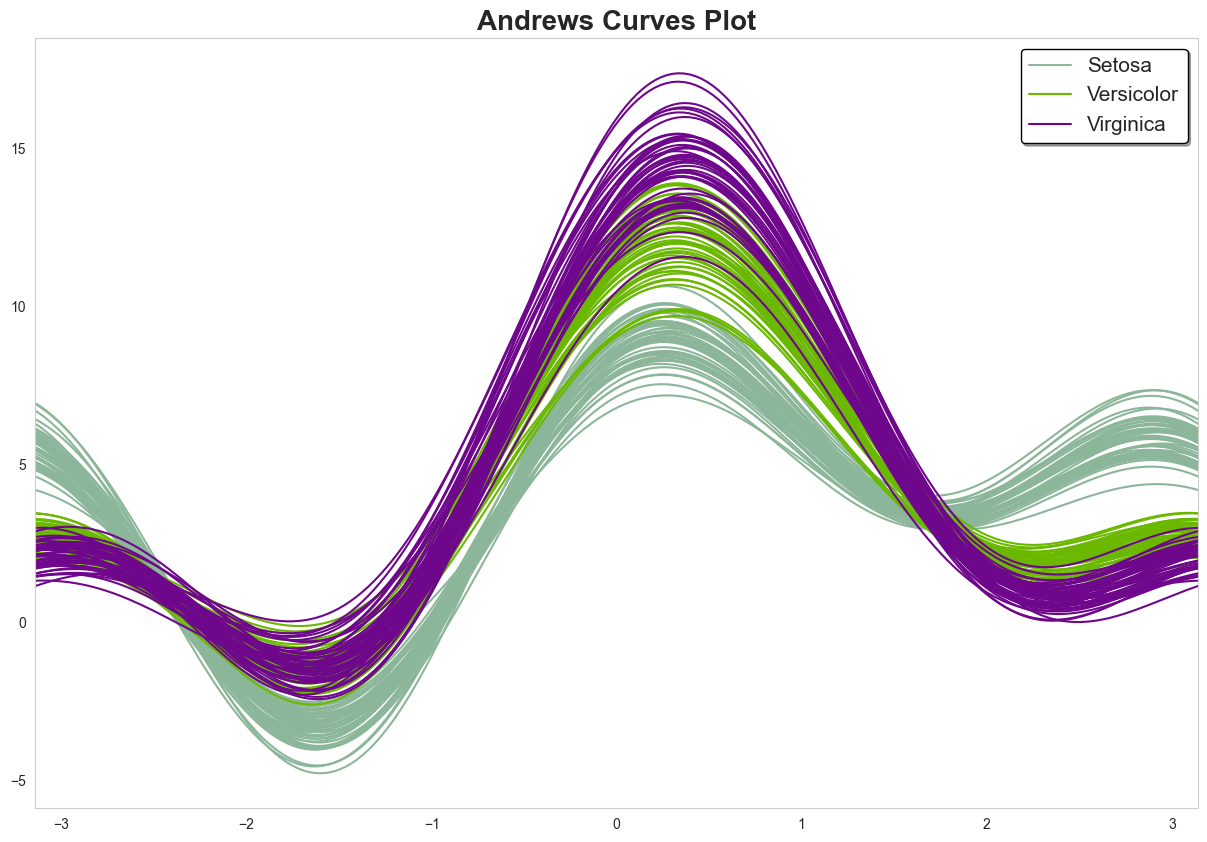

In [65]:
plt.figure(figsize=(15, 10))
andrews_curves(dataset.drop('Id', axis=1), 'Species')

plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

Pairplot

<Figure size 640x480 with 0 Axes>

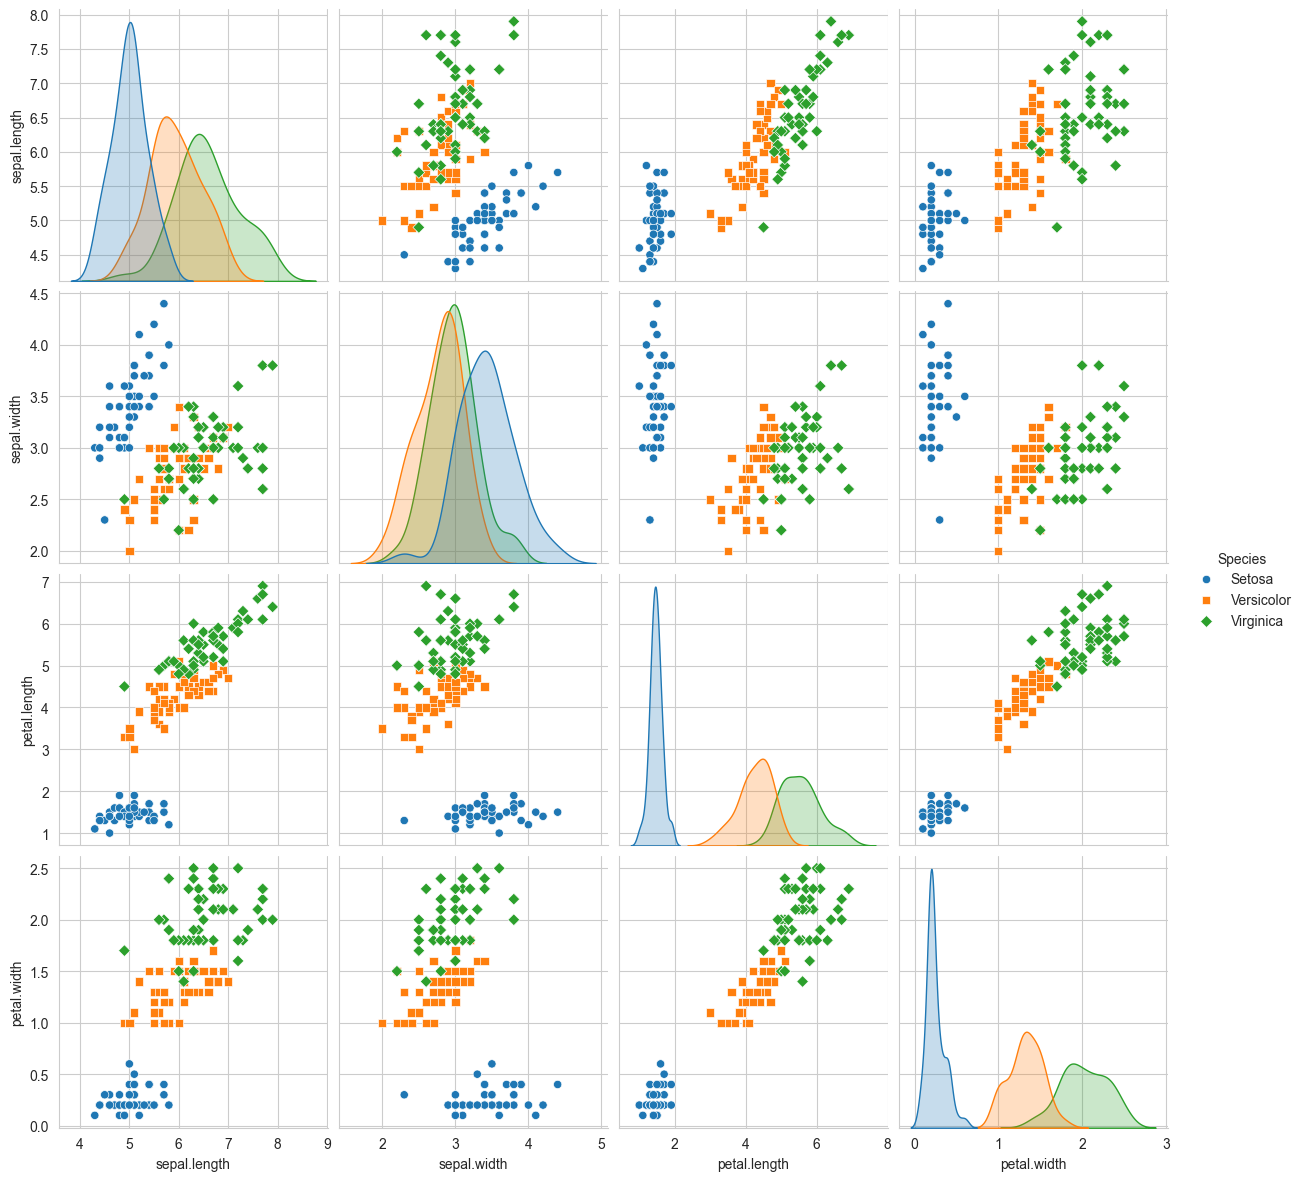

In [66]:
plt.figure()
sns.pairplot(dataset.drop('Id', axis=1), hue='Species', height=3, markers=['o', 's', 'D'])
plt.show()

Boxplot

<Figure size 640x480 with 0 Axes>

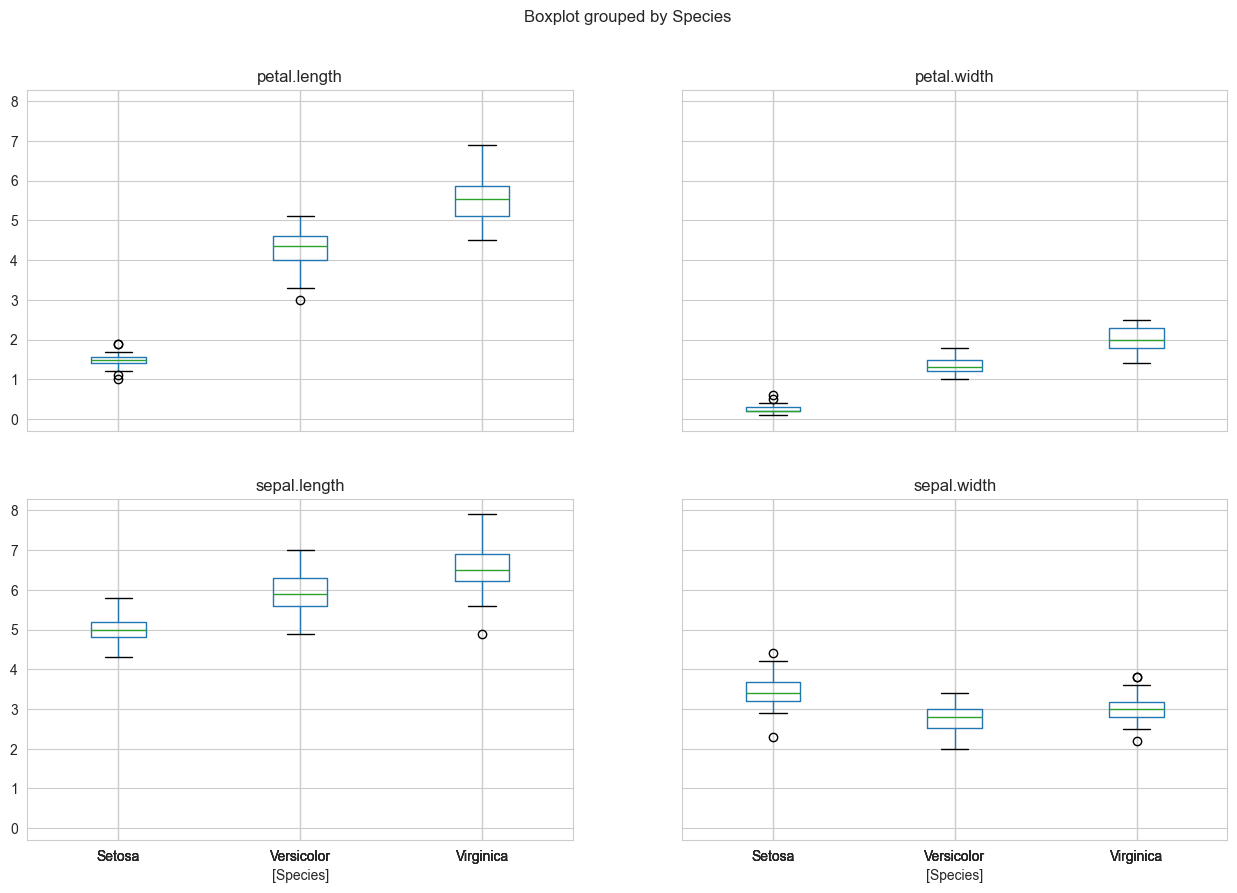

In [67]:
plt.figure()
dataset.drop('Id', axis=1).boxplot(by='Species', figsize=(15, 10))
plt.show()

3D Visualization

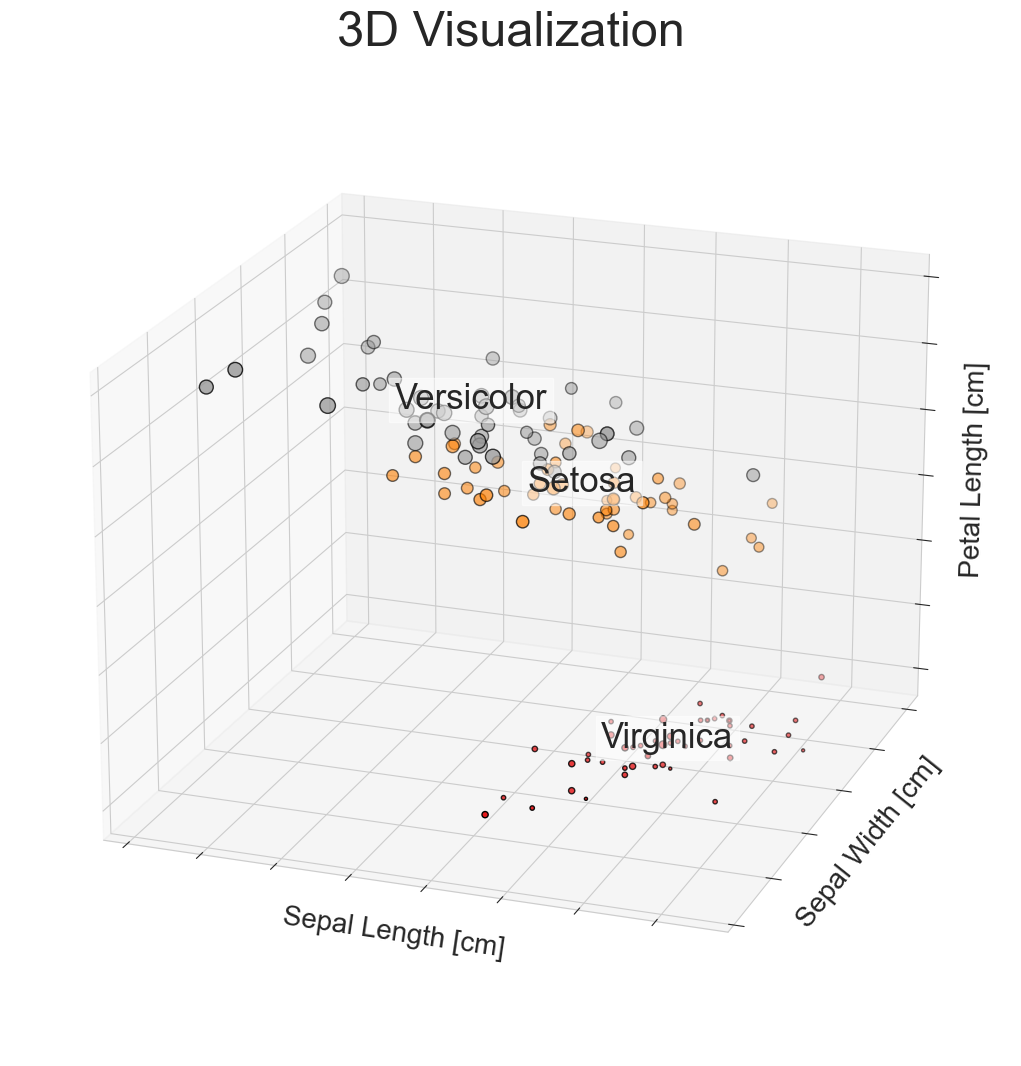

In [68]:
fig = plt.figure(1, figsize=(18, 13))

ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=110)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3] * 50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolor', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=0.5, facecolor='w', edgecolor='w'),
              size=25)

ax.set_title('3D Visualization', fontsize=35)

ax.set_xlabel('Sepal Length [cm]', fontsize=20)
ax.xaxis.set_ticklabels([])

ax.set_ylabel('Sepal Width [cm]', fontsize=20)
ax.yaxis.set_ticklabels([])

ax.set_zlabel('Petal Length [cm]', fontsize=20)
ax.zaxis.set_ticklabels([])

plt.show()

Fitting KNN Classifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of model is equal {round(accuracy, 2)} %.')

Accuracy of model is equal 96.67 %.


Searching for best k value

In [72]:
# list of k for KNN
k_list = list(range(1, 50, 2))

# list of cv scores
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

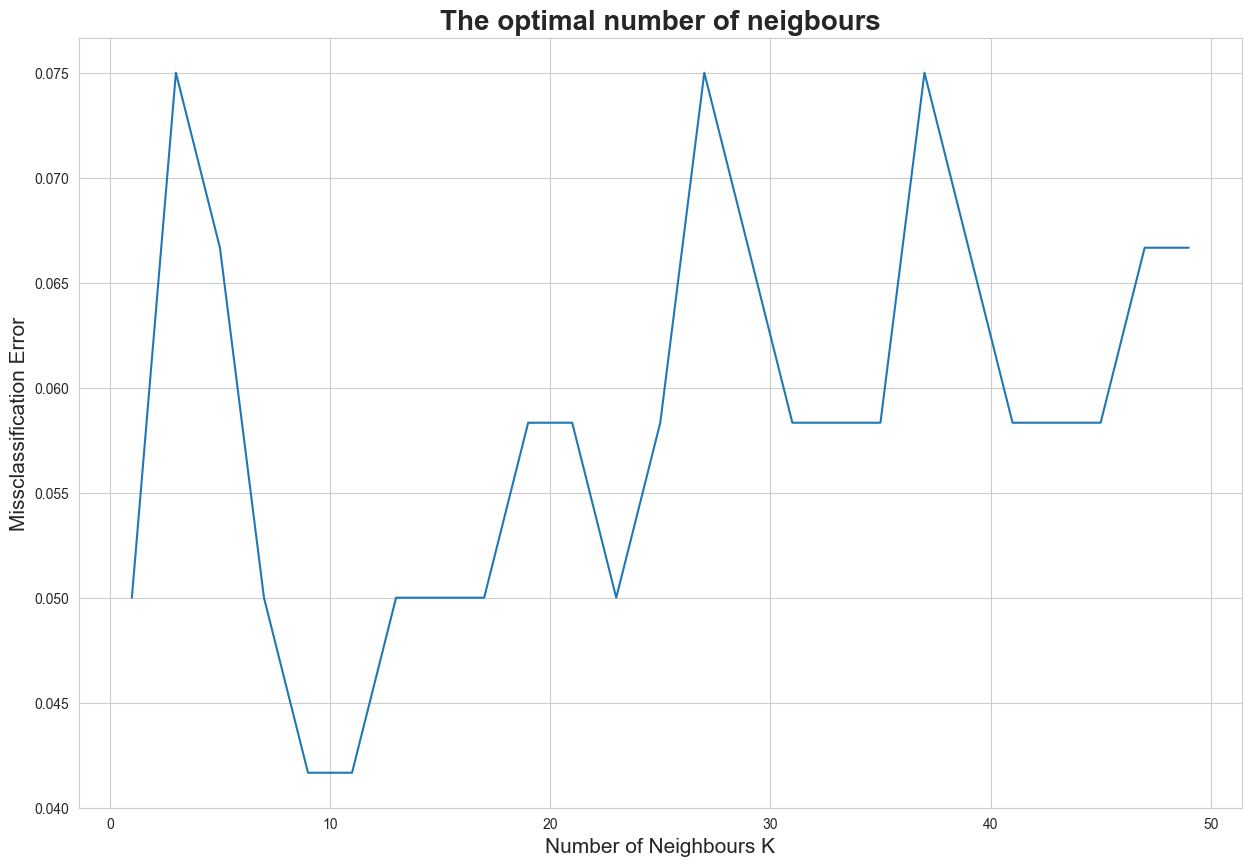

In [73]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))

plt.title('The optimal number of neigbours', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbours K', fontsize=15)
plt.ylabel('Missclassification Error', fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list, MSE)

plt.show()

Finding best k

In [74]:
best_k = k_list[MSE.index(min(MSE))]
print(f'The optimal number of neigbours is {best_k}.')

The optimal number of neigbours is 9.
